# Example Experiment

## Imports
- benchmark contains some benchmark problems (the kroD100 instance is in the tsp_qubo lib, see /experiment_archiv\tsp_50_nodes_2500_vars\objective_value_comparison\tsp.ipynb)
- qhea.solver contains the Qhea algorithm
- qhea.parameters contains the parameter object
- qhea.problem contains the QUBO and also offers TSP Qubo
- annealing contains the Simulated Annealing algorithm

In [16]:
import benchmark

from qhea.solver import Qhea
from qhea.parameters import Parameters
from qhea.problem import TSPQUBO

import annealing

import matplotlib.pyplot as plt


## Problem
- TSPQUBO object asks for a distance matrix
- TSPQUBO inherits its functionality from the QUBO class, and adds the funcionality to generate a QUBO Matrix from the distance matrix

In [11]:
tsp_d_mat = benchmark.distances.get_tsp(benchmark.distances.get_tsp_names()[4]).distances

tsp_qubo = TSPQUBO(
    d_mat=tsp_d_mat,      # Distance Matrix
    sub_problem_size=100, # number of decision variables for sub problems
    penalty=100           # Penalty (aka Lagrangian) for the constraints
)

## Parameters

In [12]:
parameters = Parameters(
    optimiziation_rate=0.005,     # probability that an individual is optimized
    n_individuals=10,             # aka population size
    n_generations=1000,           # number generations, determines length of evolution
    selection_pressure=2,         # determines the selection probabilities
    bias=0.5                      # probability that determines from which parent a gene is inherited
)

## Solver

In [13]:
solver = Qhea(
    qubo=tsp_qubo,                  	      # qubo instance of the TSP
    parameters=parameters,                    # parameters 
    local_optimizer=annealing.d_wave.anneal   # optmization algorithm for local optmization. interface is (q_mat) -> (solution_vec : list, objective_val : float)
)

## Optimize

In [14]:
result = solver.optimize() # returns evolution data, qhea.data.Data

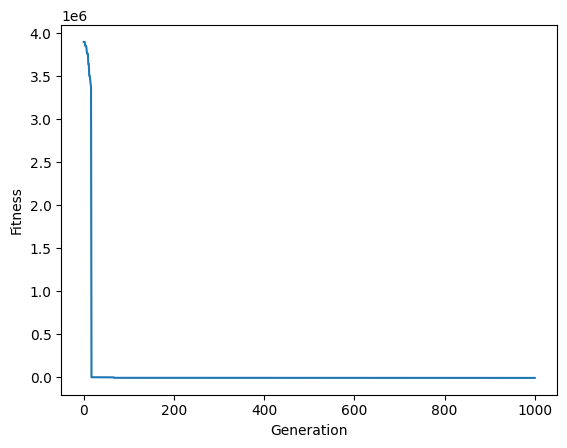

In [19]:
plt.plot(result.get_fitness_evolution())
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.show()